In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### dataset load

In [7]:
data_path = '../data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

#### look data

In [8]:
train.head(5)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


###### shape

In [9]:
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (1601458, 25)
test shape:  (3918, 25)


###### info

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 25 columns):
key                                   3918 non-null int64
apartment_id                          3918 non-null int64
city                                  3918 non-null int64
transaction_year_month                3918 non-null int64
transaction_date                      3918 non-null object
year_of_completion                    3918 non-null int64
exclusive_use_area                    3918 non-null float64
floor                                 3918 non-null int64
latitude                              3918 non-null float64
longitude                             3918 non-null float64
address_by_law                        3918 non-null int64
total_parking_capacity_in_site        3547 non-null float64
total_household_count_in_sites        3918 non-null int64
apartment_building_count_in_sites     3918 non-null int64
tallest_building_in_sites             3917 non-null float64
lowest_build

###### EDA 진행을 위해 -1로 임시 널 처리

In [ ]:
train.fillna(-1, inplace=True)

#### target distribution

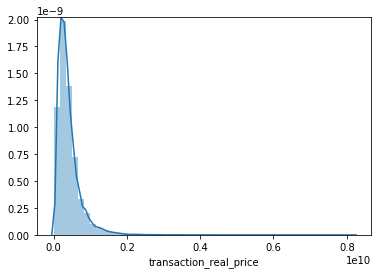

In [19]:
sns.distplot(train.transaction_real_price)

In [20]:
print("Skewed: ", train.transaction_real_price.skew())
print("Kurtosis: ", train.transaction_real_price.kurt())

Skewed:  3.1472918937559937
Kurtosis:  21.545215328939587


#### relation with target

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

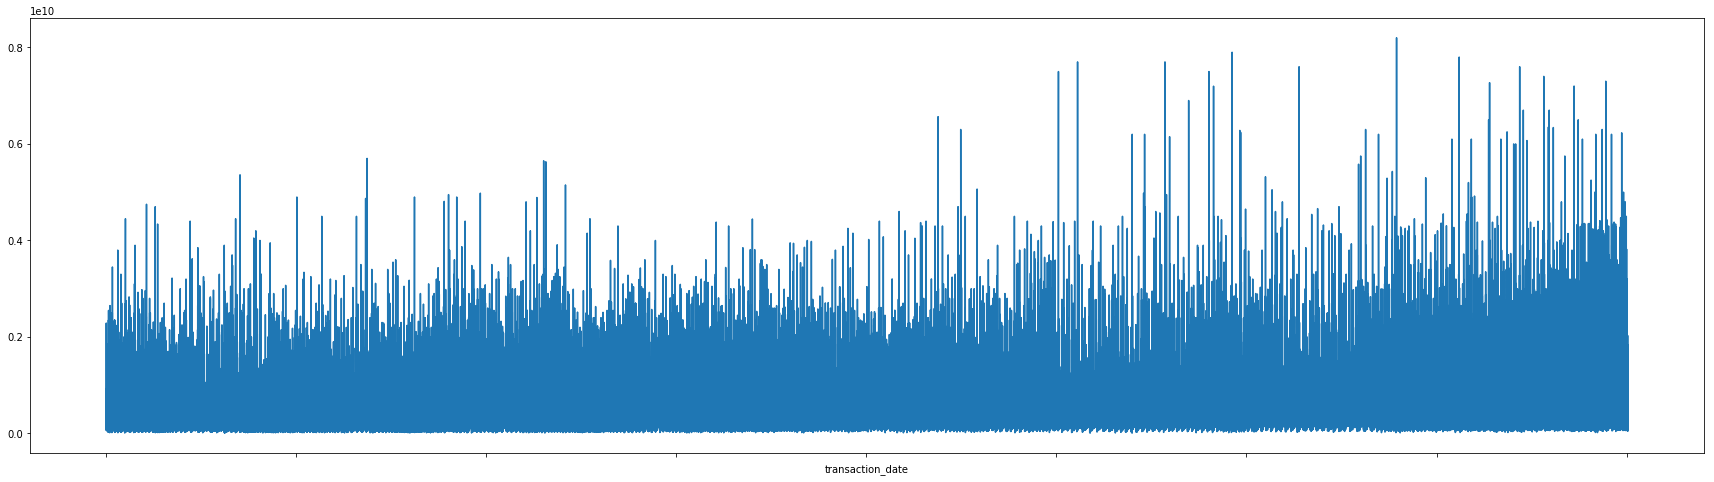

In [22]:
#거래일자
train.set_index("transaction_date")['transaction_real_price'].plot(figsize=(30,8))

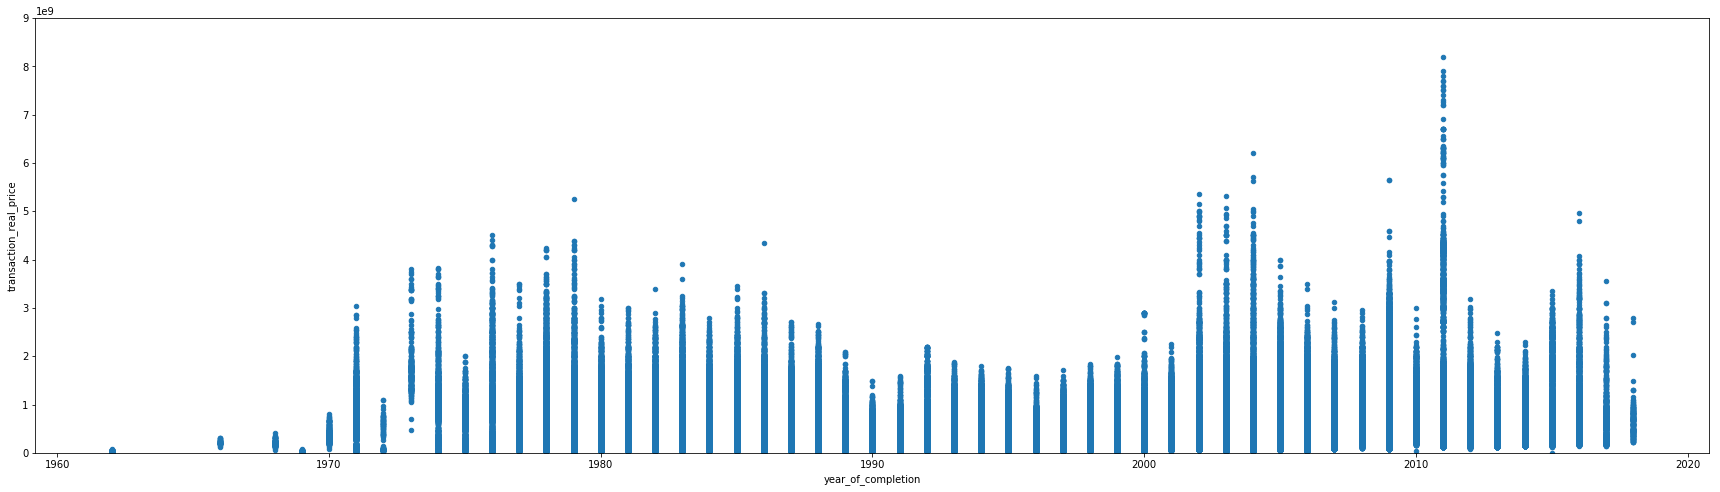

In [23]:
#완공년도
var = 'year_of_completion'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

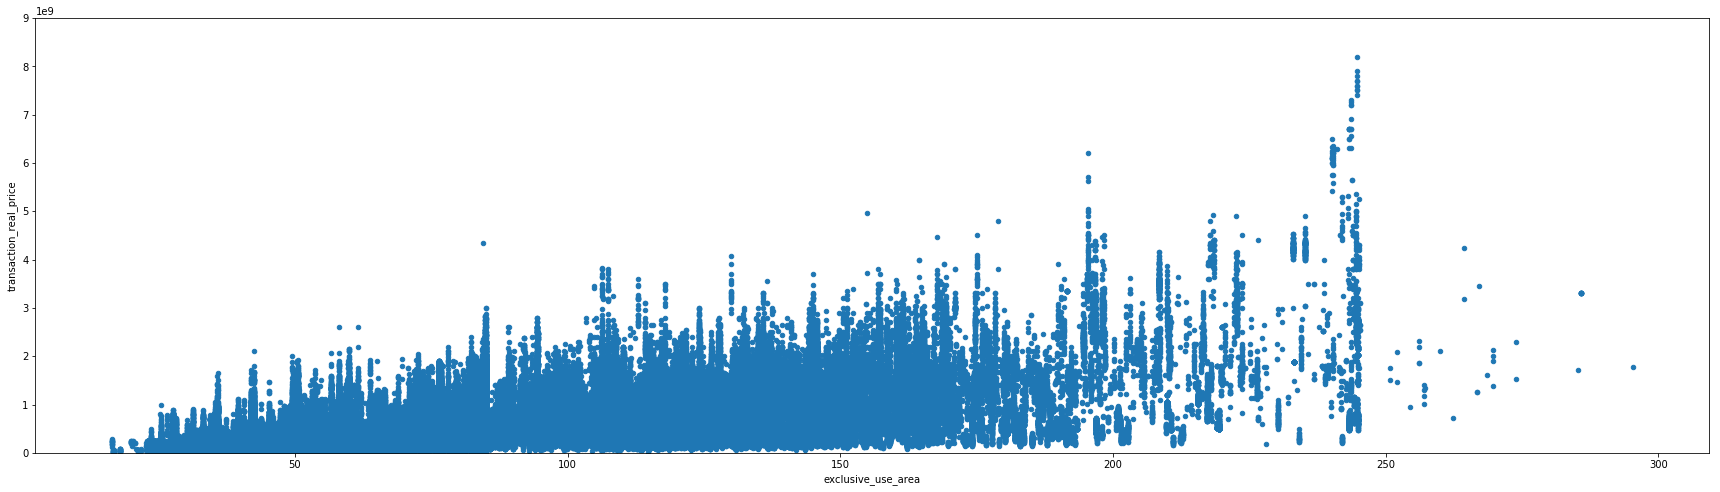

In [24]:
# 면적
var = 'exclusive_use_area'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

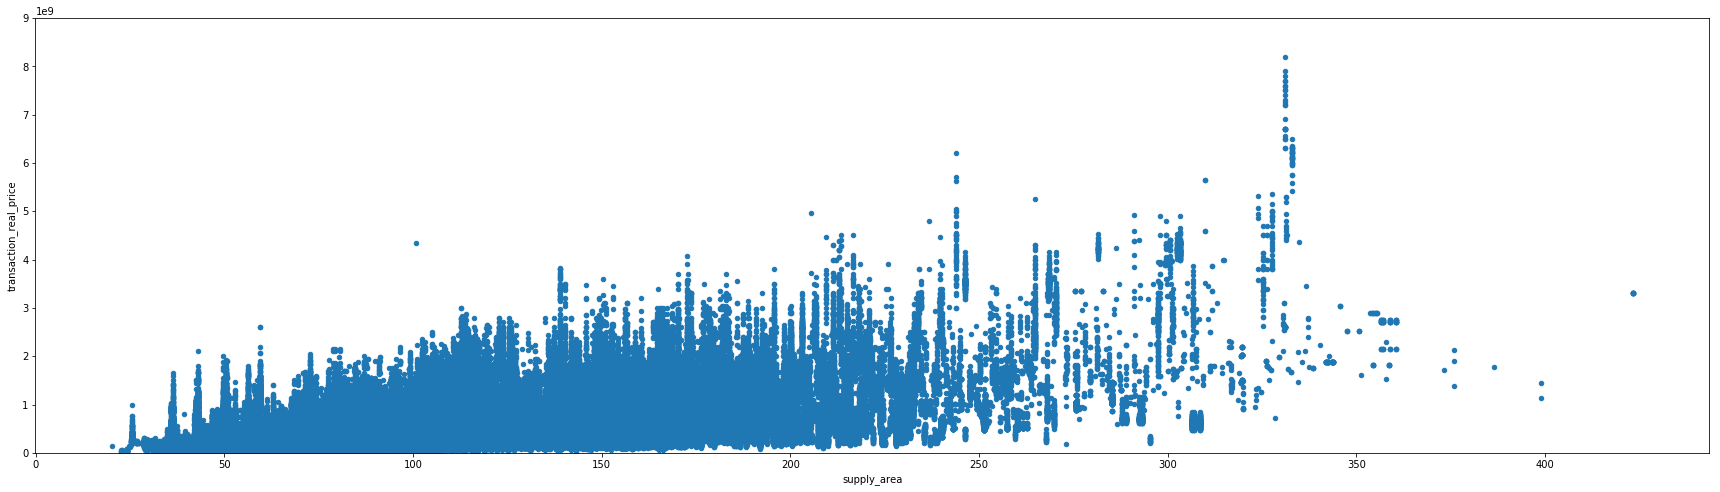

In [25]:
# 면적
var = 'supply_area'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

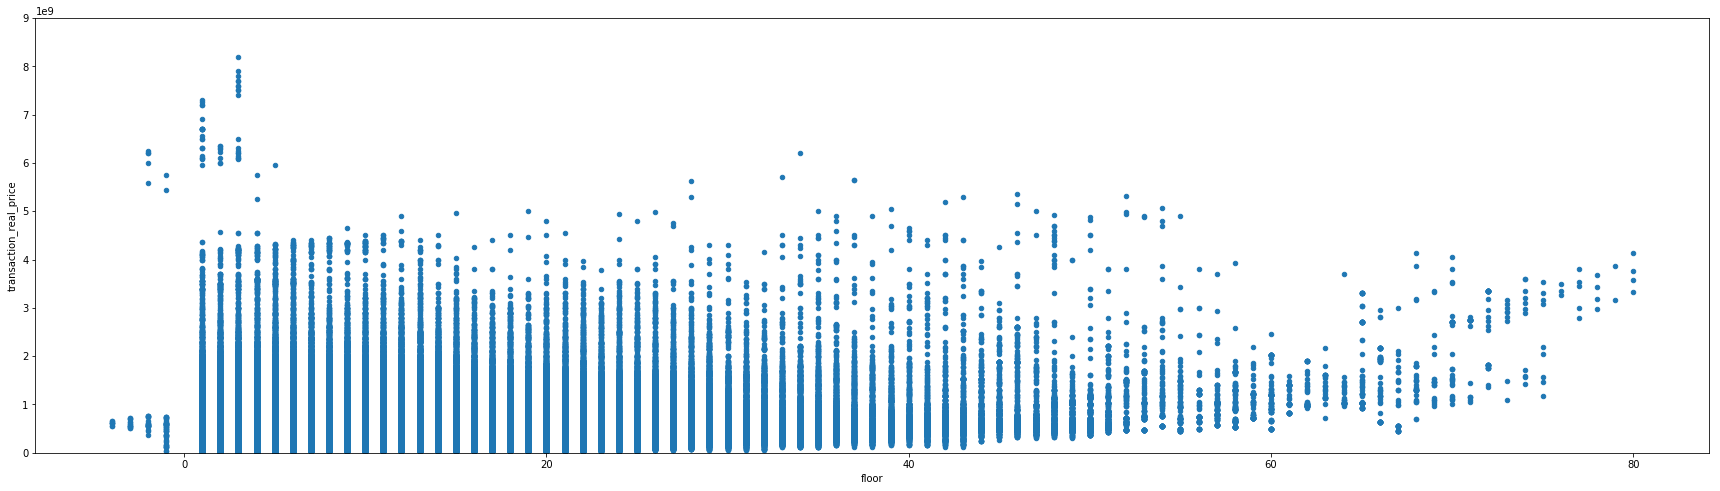

In [26]:
# 층수
var = 'floor'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

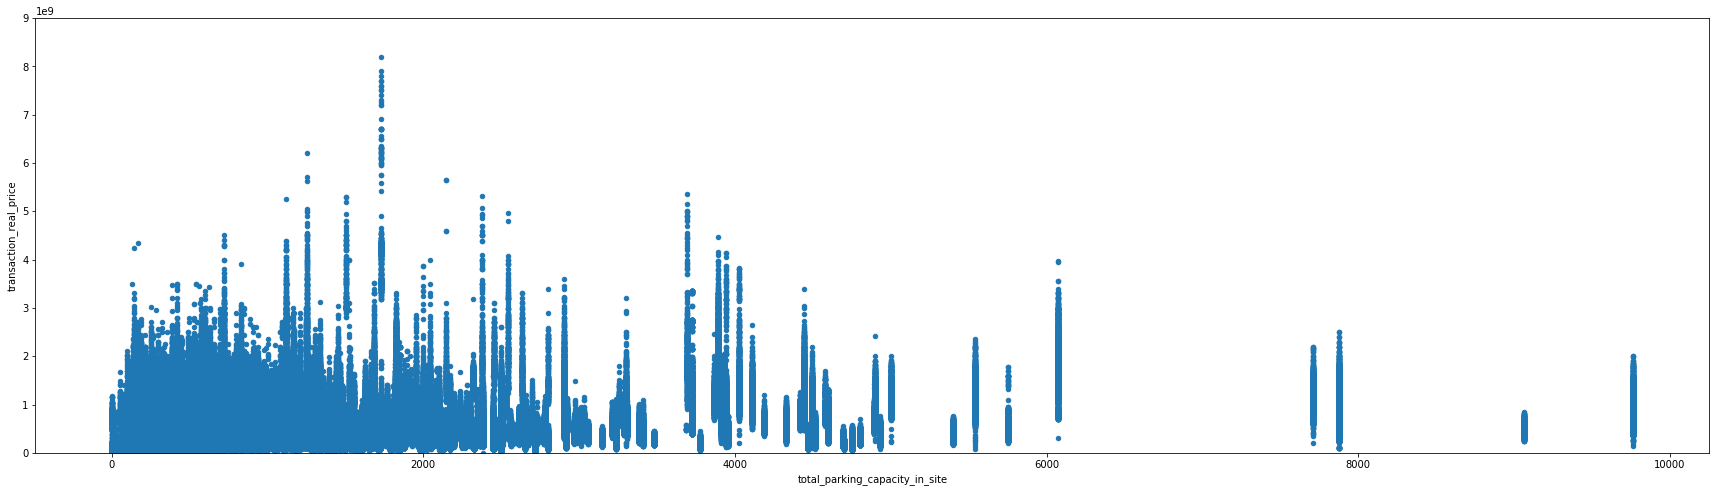

In [27]:
# 주차공간
var = 'total_parking_capacity_in_site'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

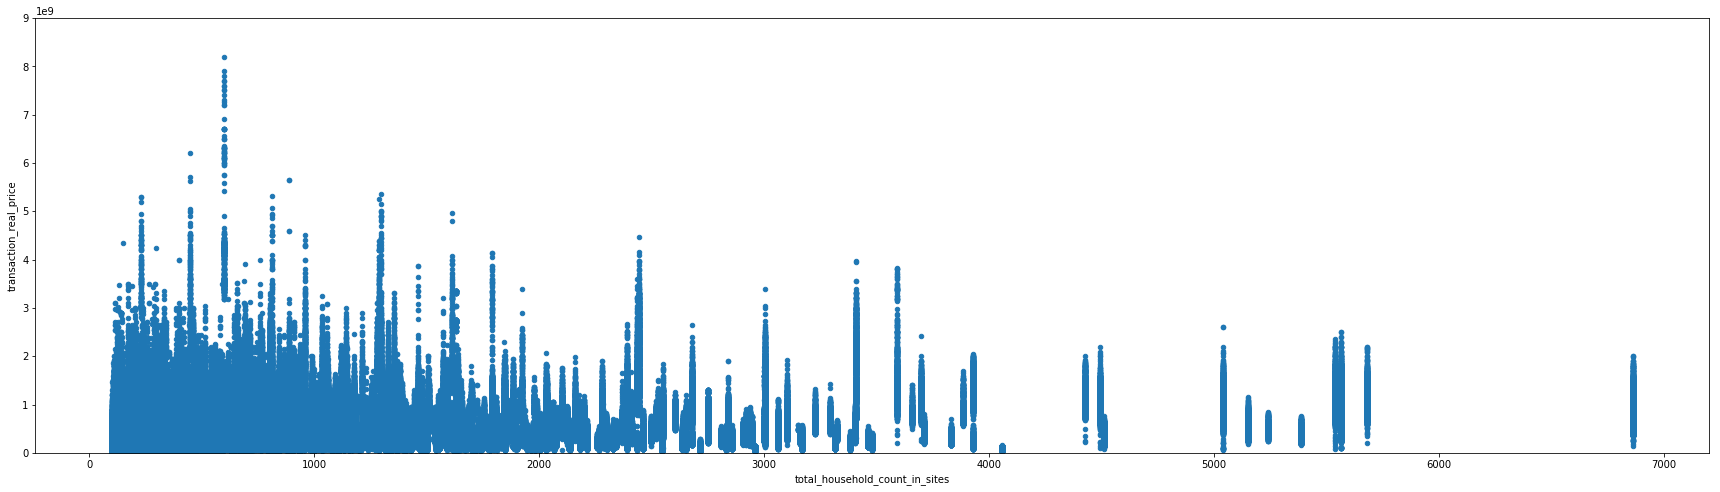

In [28]:
# 단지내 총 세대수
var = 'total_household_count_in_sites'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

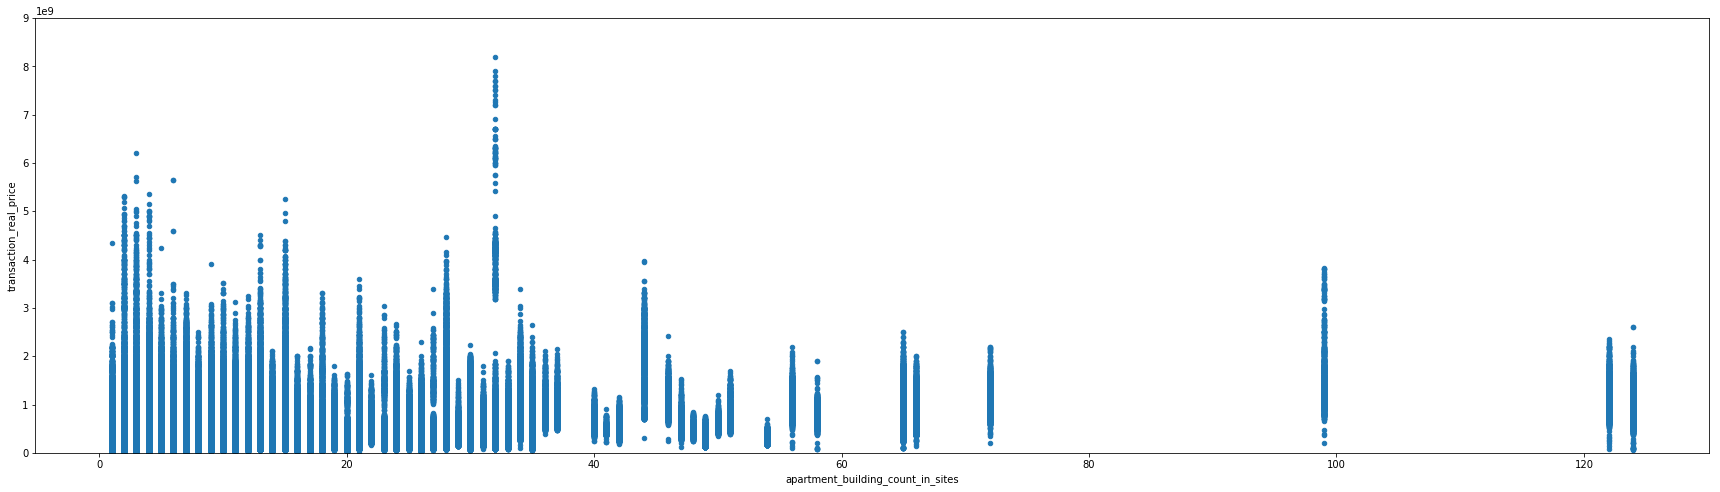

In [29]:
# 단지내 아파트 개수
var = 'apartment_building_count_in_sites'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

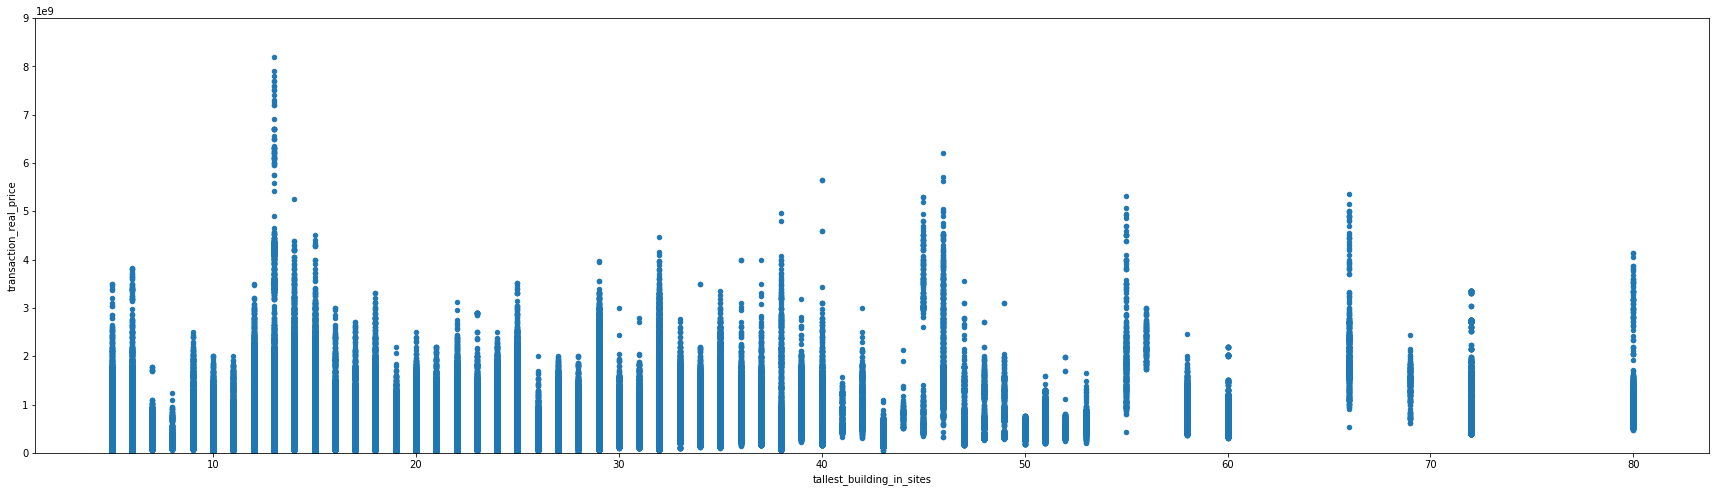

In [30]:
# 가장 높은 건물 층수
var = 'tallest_building_in_sites'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

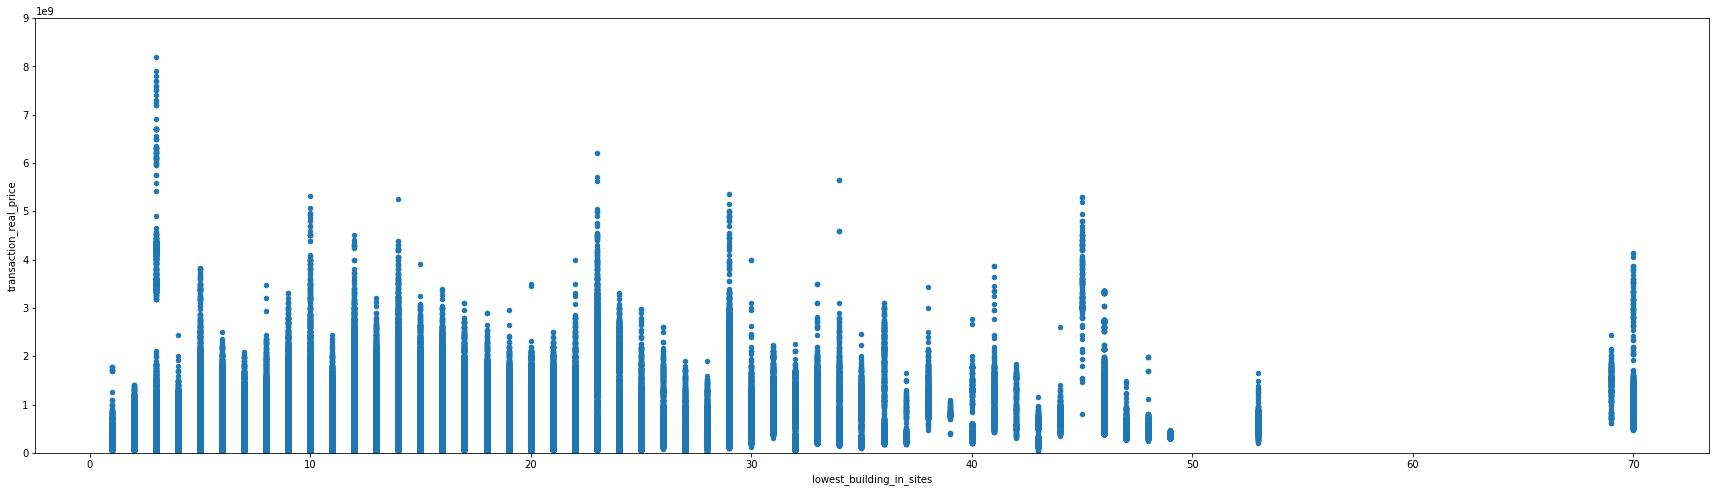

In [31]:
# 가장 낮은 건물 층수
var = 'lowest_building_in_sites'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

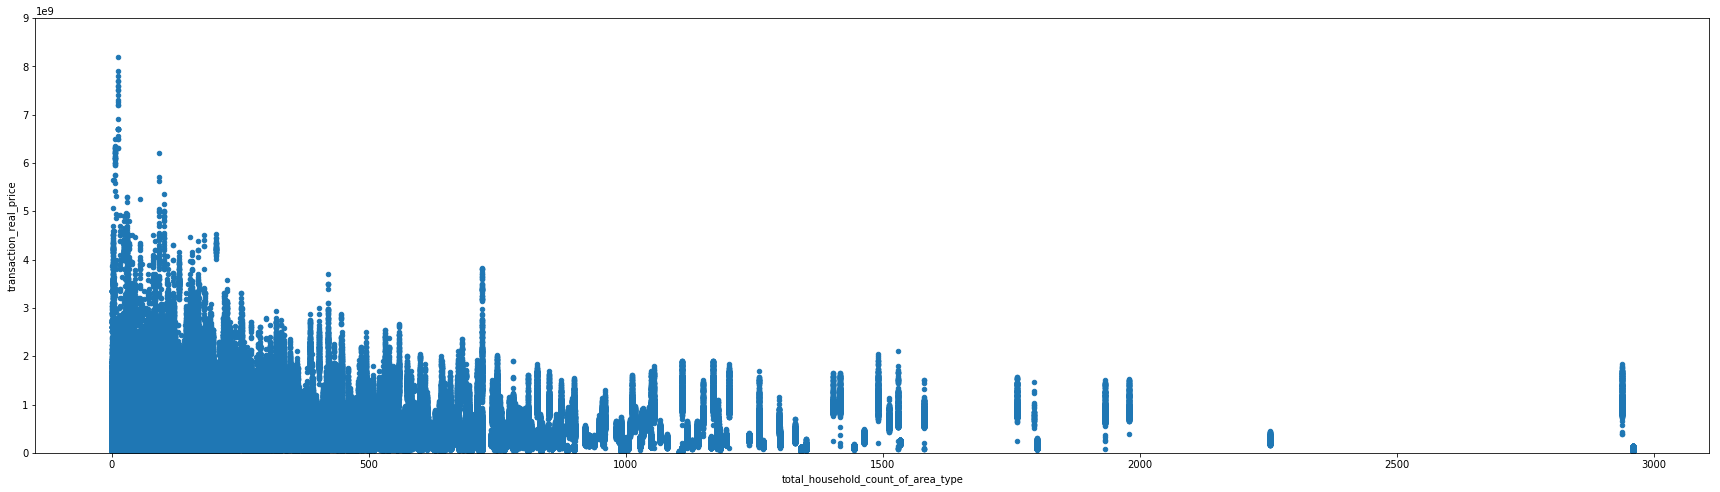

In [32]:
# 총 세대수
var = 'total_household_count_of_area_type'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

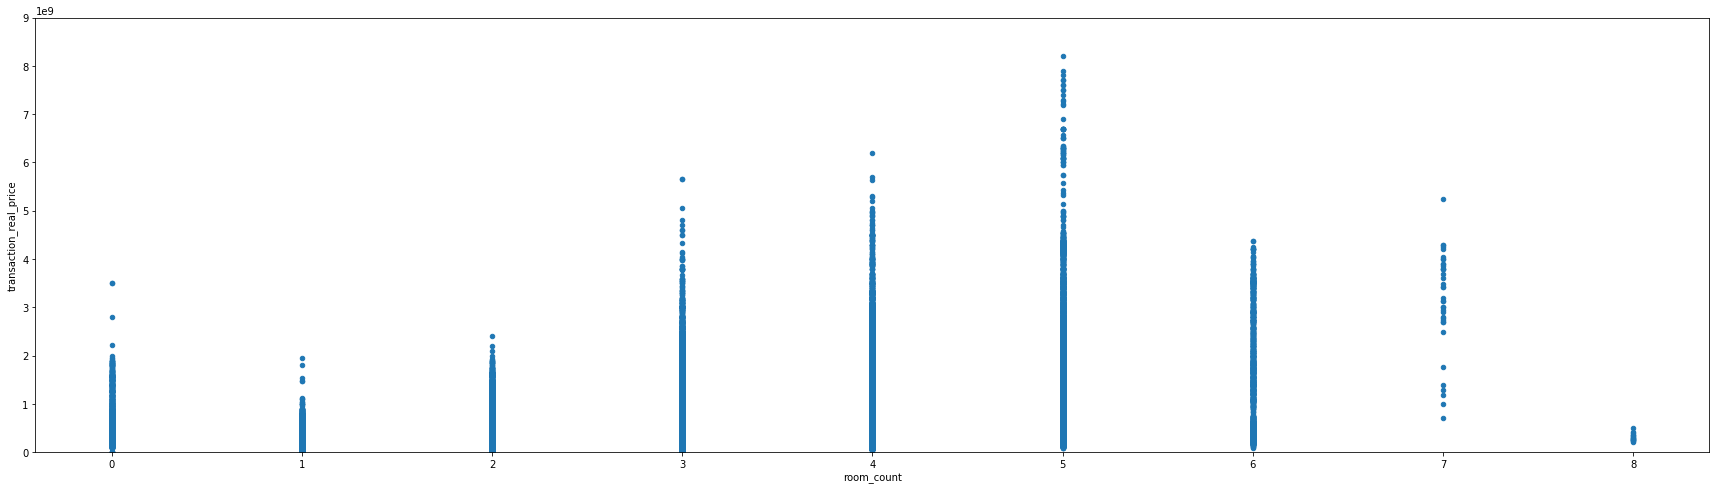

In [33]:
# 방수
var = 'room_count'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

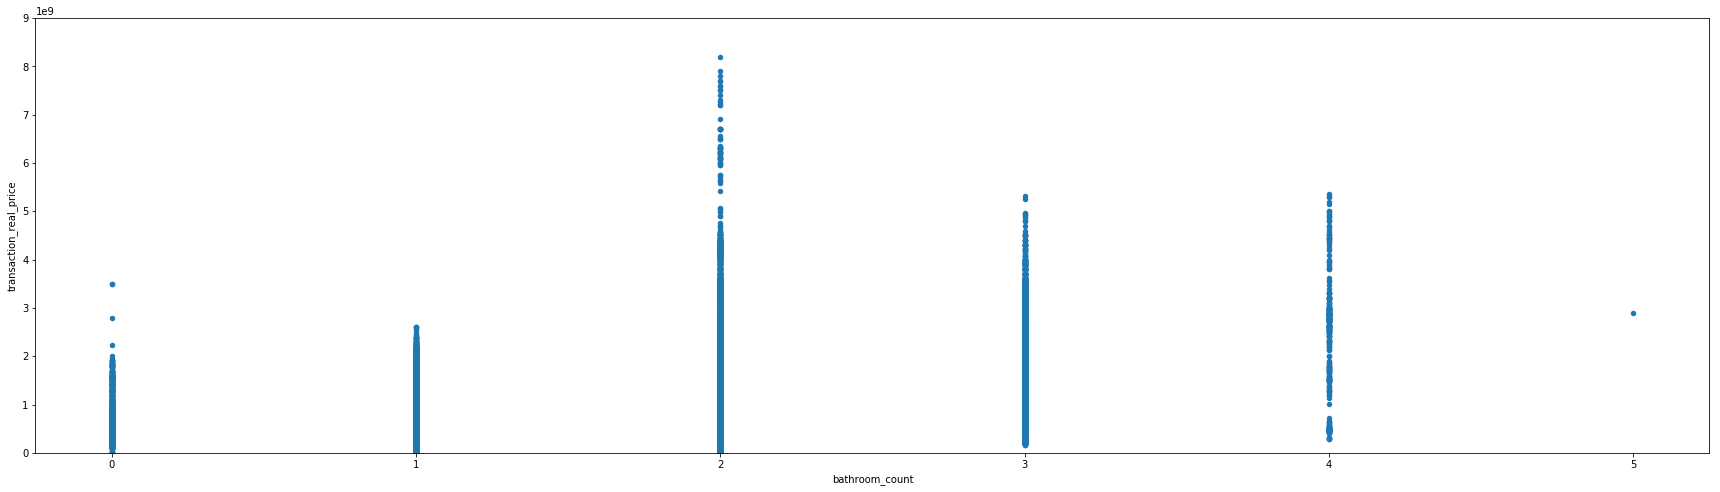

In [34]:
# 화장실 수
var = 'bathroom_count'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

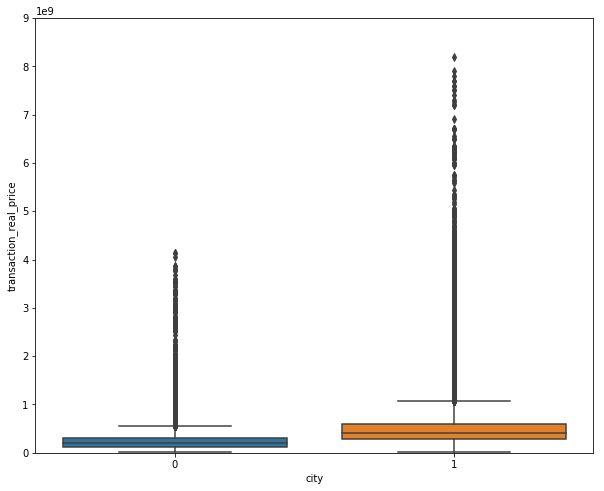

In [35]:
var = 'city'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

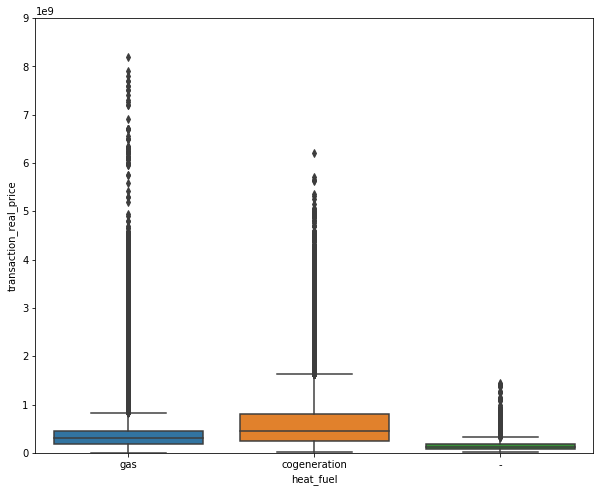

In [36]:
var = 'heat_fuel'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

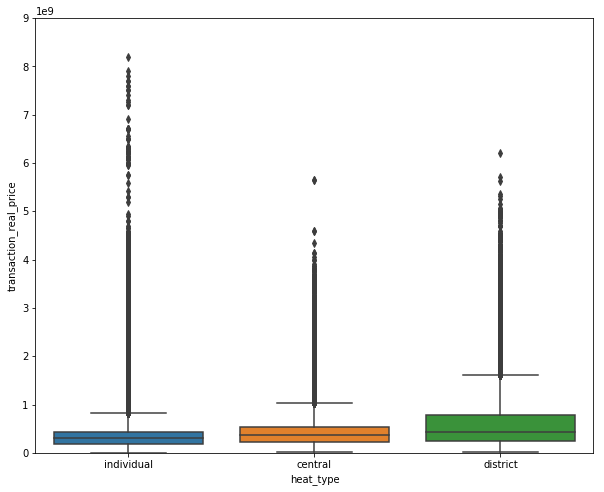

In [37]:
var = 'heat_type'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

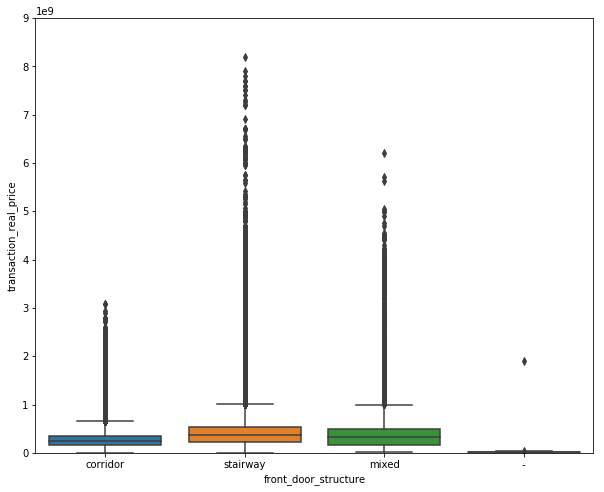

In [38]:
var = 'front_door_structure'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

#### corr matrix

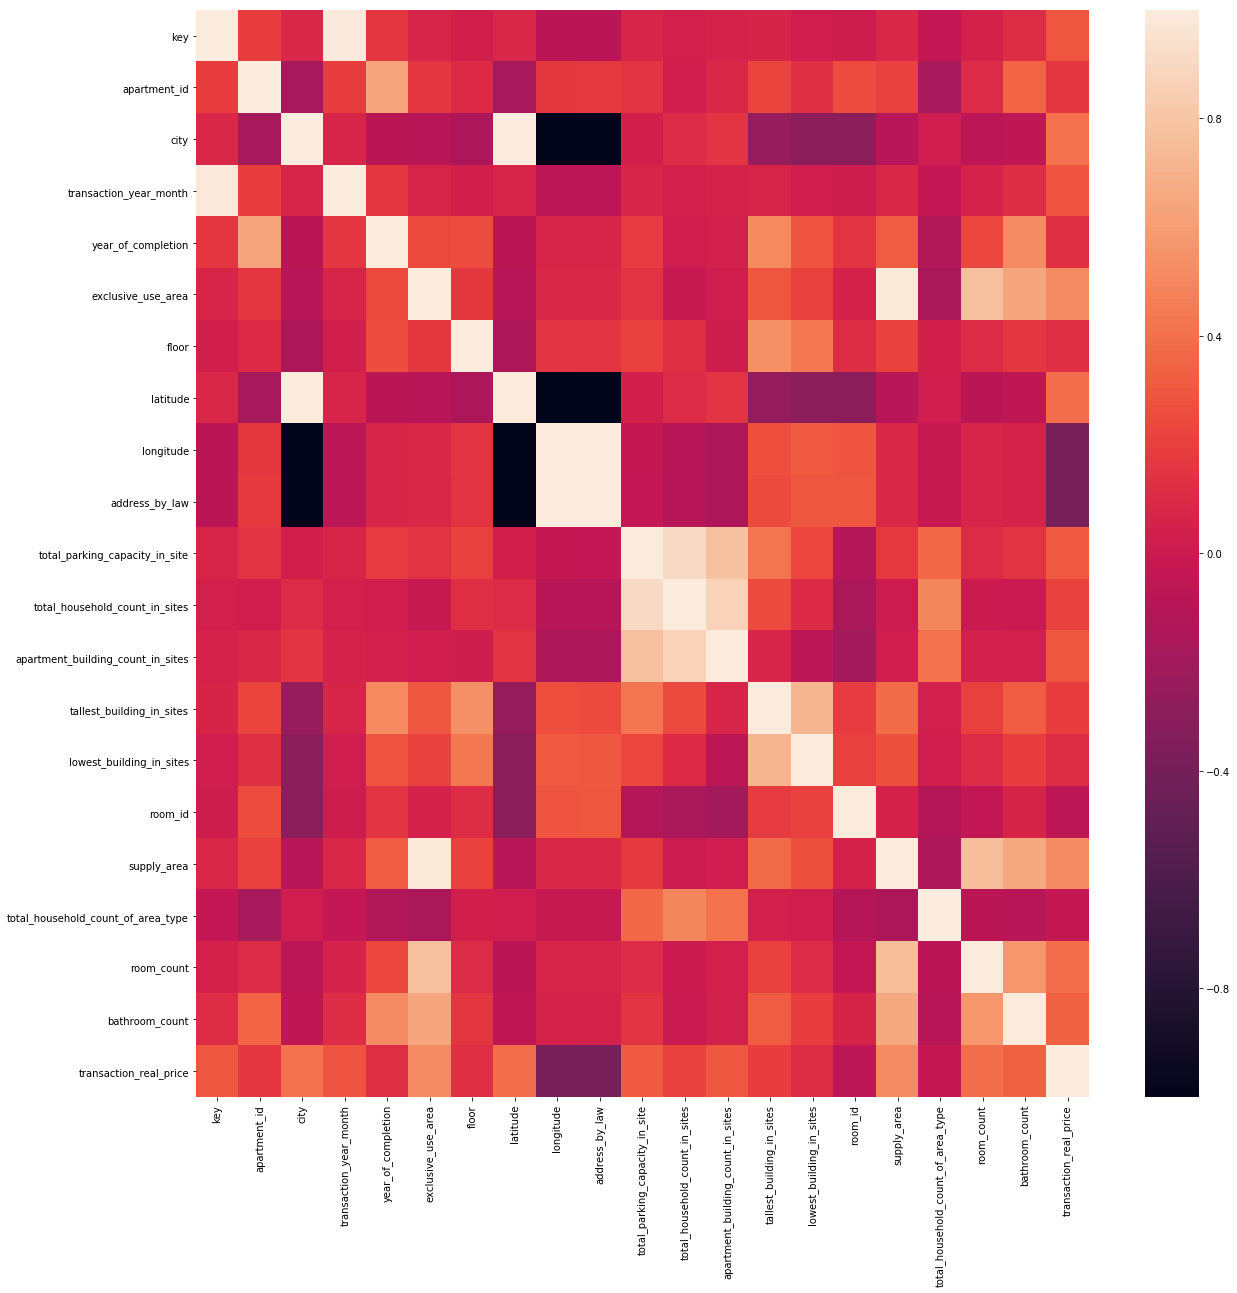

In [39]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax = 1);

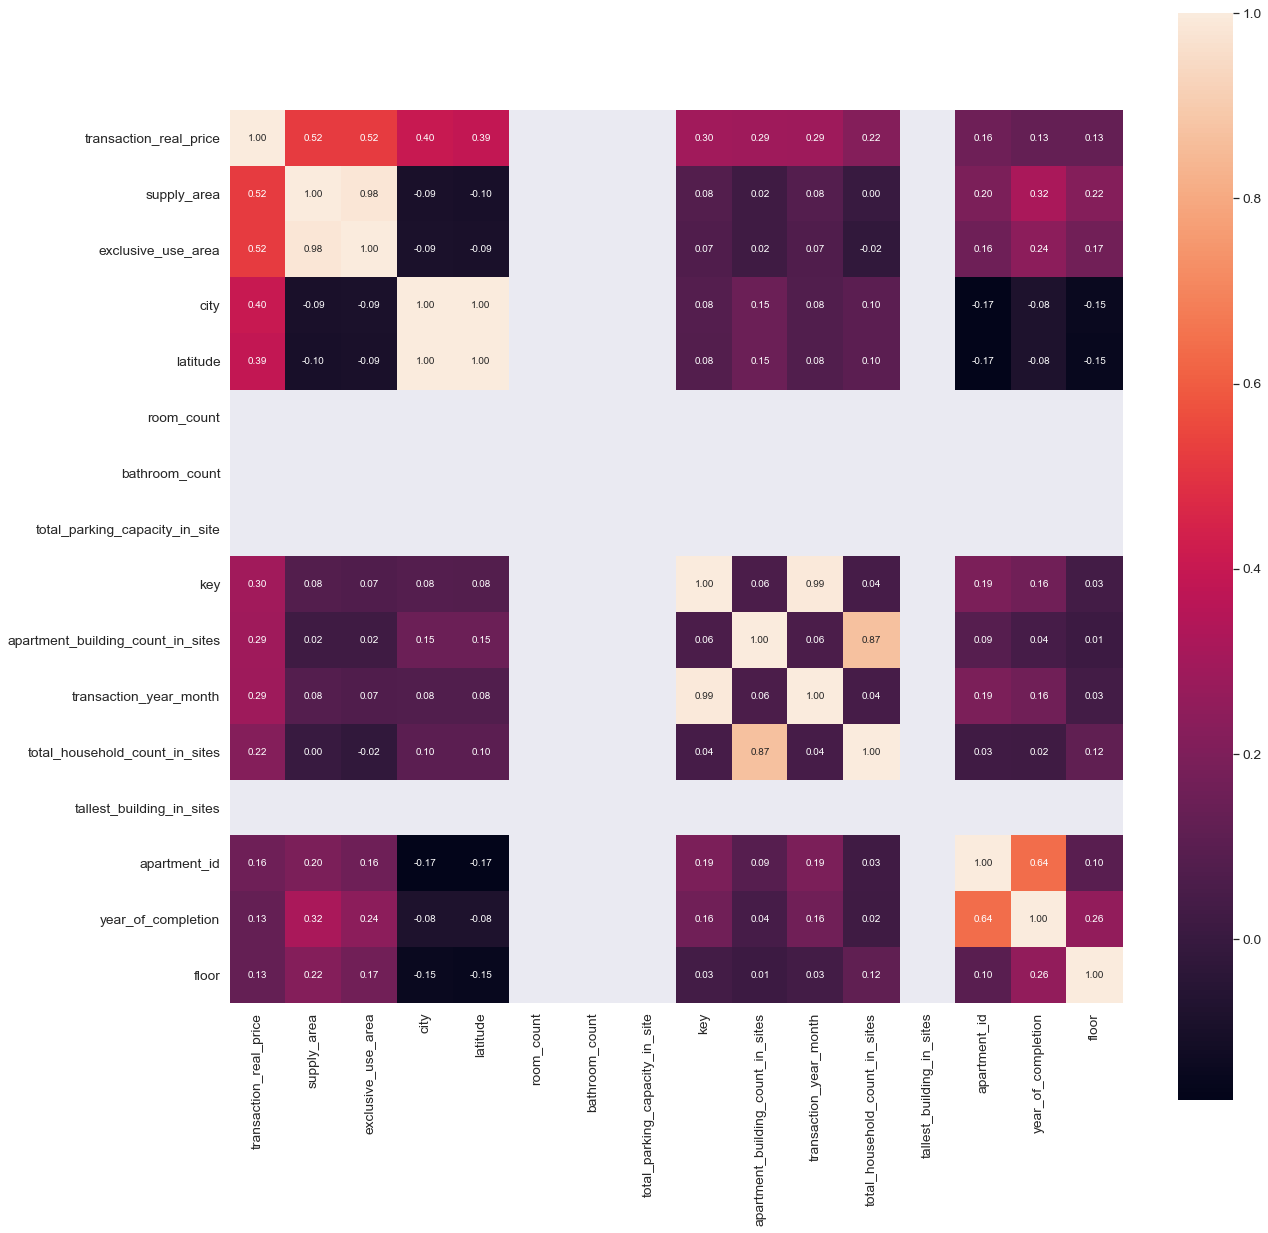

In [40]:
#saleprice correlation matrix
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### train과 test의 key는 train & test 셋으로 나누기 전의 인덱스 즉, 원래 고유 인덱스

In [12]:
# 합쳐봅시다.
data = pd.concat([train, test]).sort_values('key').set_index('key')

#### 아파트 아이디 = 단지, 일반적으로 단지별로 아파트 가격 형성

In [10]:
np.sort(np.array(list(set(data.apartment_id)))).shape

(3918,)

총 단지 개수 3918개

In [11]:
print(np.sort(np.array(list(set(data[data.city == 1].apartment_id)))).shape)
print(np.sort(np.array(list(set(data[data.city == 0].apartment_id)))).shape)

(2637,)
(1281,)


서울 아파트 단지: 2637개

부산 아파트 단지: 1281개

#### (중요!) 각 아파트 단지 별 test set 1개로 구성

- 1) 아파트 단지별 test 1개씩이니 일반적으로 단지 시세를 고려하는 것이 필요 (지역시세)
- 2) 각 지역별 시계열 성 역시 고려 필요
- ** 단 아파트 단지에 거래 정보가 1개인 단지 역시 존재 (이 경우 1개가 테스트 케이스). 이 경우 적절한 방법을 통해 가격을 추정해야 함
- ** 적절한 방법은 한 번 봅시다.

#### 아파트 단지네 테스트 케이스가 1개인 단지는 몇개일까

#### 서울부터 봅시다

In [12]:
seoul_apt_id = np.sort(np.array(list(set(data[data.city == 1].apartment_id))))

In [13]:
seoul_cnt_by_apt_id = []
for v in seoul_apt_id:
    seoul_cnt_by_apt_id.append({"apt_id": v, "total_count": len(data[data.apartment_id == v]), "test_count": np.sum((data[data.apartment_id == v]).transaction_real_price == 0) * 1})

In [14]:
seoul_cnt_by_apt_id = pd.DataFrame(seoul_cnt_by_apt_id)

In [20]:
seoul_cnt_by_apt_id[seoul_cnt_by_apt_id.total_count < 40]

,apt_id,test_count,total_count
35,100,1,29
129,316,1,2
277,710,1,9
382,989,1,23
426,1136,1,35
446,1179,1,32
496,1299,1,34
907,3751,1,3
1154,4377,1,27
1287,5364,1,26
